In [1]:
import numpy as np
import plot_functions as pf
import utilities2 as ut2
import brom_functions as bf

### Methods 2 - the biogeochemical model

The biogeochemical model contains the following state variables: autotrophs,
$\text{Phy}\ \lbrack\text{mg C m}^{- 3}\rbrack$; heterotrophs,
$\text{Het}\ \lbrack\text{mg C m}^{- 3}\rbrack$;
$\text{NH}_{4}^{+}\ \lbrack\text{mM N m}^{- 3}\rbrack$;
$\text{NO}_{2}^{-}\ \lbrack\text{mM N m}^{- 3}\rbrack$;
$\text{NO}_{3}^{-}\ \lbrack\text{mM N m}^{- 3}\rbrack$;
$\text{Si}\ \lbrack\text{mM Si m}^{- 3}\rbrack$;
$\text{PO}_{4}^{3 -}\ \lbrack\text{mM P m}^{- 3}\rbrack$;
$O_{2}\ \lbrack\text{mM O}_{2}\ m^{- 3}\rbrack$;
$\text{SO}_{4}^{2 -}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
$S_{2}O_{3}^{2 -}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
$S^{0}\ \lbrack\text{mM S m}^{- 3}\rbrack$;
$H_{2}S\ \lbrack\text{mM S m}^{- 3}\rbrack$; dissolved inorganic
carbon, $\text{DIC}\ \lbrack\text{mM C m}^{- 3}\rbrack$; particulate
OM ($\text{POM}\ \lbrack\text{mg C m}^{- 3}\rbrack$) ; dissolved OM
($\text{DOM}\ \lbrack\text{mg C m}^{- 3}\rbrack$);
$\text{TA}\ \lbrack\text{mM}m^{- 3}\rbrack$. $P\text{OM}$ and
$D\text{OM}$ have a Redfield stoichiometry of $106C:16N:1P$.

#### Phototrophic producers

Phototrophic producers' growth $\text{Phy}_{\text{growth}} = \mu \cdot \lbrack\text{Phy}\rbrack$ is parametrized according to the empirical equation that describes the phytoplankton daily specific growth rate $\mu\ \lbrack d^{- 1}\rbrack$ as a function of the specific photosynthetic rate of biomass
$P^{B}\ \lbrack{mg\ C\ (mg\ Chl\ a\ d)}^{- 1}\rbrack$ and the $\frac{\text{Chl a}}{C}$ ratio $\lbrack{mg\ Chl\ a\ (mg\ C)}^{- 1}\rbrack$ (Cloern et al., 1995):

$\mu = 0.85P^{B}\frac{\text{Chl a}}{C} - 0.015$,

$P^{B} = Dp_{m}^{B}(1 - \exp\frac{I_{t}\alpha}{p_{m}^{B}})$,

$\frac{\text{Chl a}}{C} = 0.003 + 0.0154e^{0.050T}e^{- 0.059I}\tau$.

Here, $D$ is the photoperiod $\lbrack h\rbrack$ , calculated according to (Fennel and Neumann, 2014),
$p_{m}^{B}$ is the maximum hourly rate of photosynthesis normalized to chlorophyll biomass $\lbrack\text{mg}\ C\ (\text{mg}\ \text{Chl a}\ h)^{- 1}\rbrack$,
$I_{t}$ is the instantaneous photosynthetically active radiation ($\text{PAR}$) $\lbrack\mu\text{M quanta m}^{- 2}\ s^{- 1}\rbrack$,
and $\alpha$ defines photosynthetic efficiency at low irradiance $\lbrack\text{mg}\ C\ (\text{mg}\ \text{Chl a}\ h)^{- 1}\ (\mu M\ \text{quanta}\ m^{- 2}\ s^{- 1})^{- 1}\rbrack$.
$T$ is the temperature $\lbrack^{\circ}C\rbrack$,
$I$ is the daily irradiance $\lbrack\text{M quanta m}^{- 2}\ d^{- 1}\rbrack$,
and $\tau$ is the nutrient-limited growth rate $\lbrack d^{- 1}\rbrack$.
$\tau = \tau_{N}\tau_{\text{Si}}\tau_{PO_{4}^{3 -}}$ where 
$\tau_{N}$ is the nitrogen-limited growth rate,
$\tau_{\text{Si}}$ is the silicon-limited growth rate,
and $\tau_{P}$ is the phosphorus-limited growth rate: $\tau_{N} = \tau_{NH_{4}^{+}} + \tau_{NO_{x}}$,
$\tau_{NH_{4}^{+}} = f_{r}(Ks_{NH_{4}^{+}},\lbrack$NH$_{4}^{+}\rbrack)$,
$\tau_{NO_{x}} = f_{r}(Ks_{NO_{x}},\lbrack\text{NO}_{2}^{-}\rbrack + \lbrack\text{NO}_{3}^{-}\rbrack) \cdot f_{i} Ks_{NH_{4}^{+}},\lbrack\text{NH}_{4}^{+}\rbrack)$;
$\tau_{\text{Si}} = f_{r}(Ks_{\text{Si}},\lbrack$Si$\rbrack)$;
$\tau_{PO_{4}^{3 -}} = f_{r}(Ks_{PO_{4}^{3 -}},\lbrack$PO$_{4}^{3 -}\rbrack)$.
$f_{r}$ and $f_{i}$ are the sigmoid type functional response and inhibitor function, respectively, of the following forms:
$f_{r}(Ks_{R},R) = \frac{R^{2}}{Ks_{R}^{2} + R^{2}}$ and
$f_{i}(Ks_{R},R) = \frac{Ks_{R}^{2}}{Ks_{R}^{2} + R^{2}}$ where
R is the limiting or inhibiting resource concentration and $Ks_{R}$ is the corresponding half-saturation constant.
Therefore, for example in case of high availability of ammonium
($\lbrack\text{NH}_{4}^{+}\rbrack > > Ks_{NH_{4}^{+}}$),
$\tau_{NH_{4}^{+}}$ tends to converge to a value of one while the nitrate and nitrite limiting term $\tau_{NO_{x}}$ inhibited by ammonium tends to converge to a value of zero.

Let us demonstate for example a sigmoid type functional response function:

In [2]:
def sigmoid_powered(ks, r):
    """ks - half-saturation constant
       r  - limiting resource"""
    return np.power(r, 2)/(np.power(ks, 2)+np.power(r, 2))

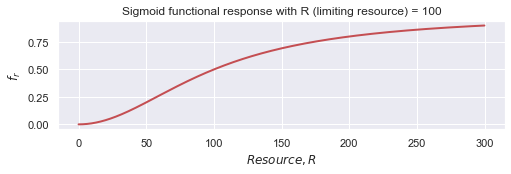

In [3]:
resource = np.arange(0, 300, 0.1)
pf.plot_range('$Resource, R$', '$f_r$', 'Sigmoid functional response with R (limiting resource) = 100', resource, sigmoid_powered(100, resource))

Here we see that the sygmoid type functional response function returns values close to 1 when the resource values are much higher then a half-saturation constant, it equals 0.5 when the resouce value matches a half-saturation constant value, and tends to zero when the resource values are much less then a half-saturation constant.

Get some data of the averaged year and check how functional responses and inhibitors would work together.

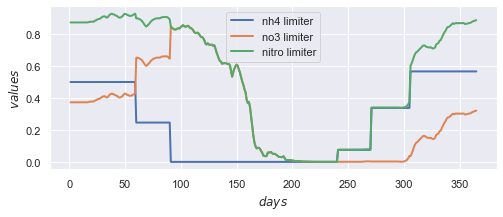

In [4]:
par, temperature, no3, nh4, po4, si, irradiance = ut2.get_data() # get data
nh4_limiter = bf.phy_nh4_limiter(knh4_lim=7, nh4=nh4) # calculate ammonium limiter
no3_limiter = bf.phy_no3_limiter(knox_lim=15, knh4_lim=7, no3=no3, no2=0, nh4=nh4)
pf.plot_year_multi((nh4_limiter, 'nh4 limiter'),(no3_limiter, 'no3 limiter'),(no3_limiter+nh4_limiter, 'nitro limiter'))

The phototrophic producers excretion is parametrized as
$\text{Phy}_{\text{excrete}} = K_{phy\_ excrete} \cdot \lbrack\text{Phy}\rbrack$
and the phototrophic producers mortality as
$\text{Phy}_{\text{mortality}} = K_{phy\_ mortality} \cdot \lbrack\text{Phy}\rbrack \cdot \lbrack\text{Phy}\rbrack$
where $K_{phy\_ excrete}$ is the phytoplankton excretion coefficient and
$K_{phy\_ mortality}$ is the phytoplankton mortality coefficient.